## Anslysis of the 'wind events'
Wind event denotes a particular circumstances occurring in Vistula Lagoon. Such events were identified and analyzed.

In [1]:
import sys
print("Python version: {}".format(sys.version))

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from matplotlib import gridspec

import datetime as dt
import ipywidgets as widgets

import sys
print("Python version: {}".format(sys.version))

path = "../data/"
prepared_path = path+"prepared/"

plt.rcParams['figure.figsize'] = [7, 5]
plt.rcParams['figure.dpi'] = 100 #

Python version: 3.11.5 | packaged by Anaconda, Inc. | (main, Sep 11 2023, 13:26:23) [MSC v.1916 64 bit (AMD64)]


### Importing data

In [3]:
df_hel = pd.read_pickle(prepared_path+"df_hel.pkl")
H0_hel = 500
df_hel["wl"] = (df_hel["stage"] - H0_hel)/100.
df_hel = df_hel.set_index("date_time")
del df_hel["stage"]
df_hel.head(3)

,wl
date_time,
2008-01-01 00:10:00,0.27
2008-01-01 00:30:00,0.27
2008-01-01 03:20:00,0.26


In [4]:
df_tol = pd.read_pickle(prepared_path+"df_tol.pkl")
H0_tol = 508
df_tol["wl"] = (df_tol["stage"] - H0_tol)/100.
df_tol = df_tol.set_index("date_time")
del df_tol["stage"]
df_tol.head(3)

,wl
date_time,
2008-01-01 01:40:00,0.26
2008-01-01 05:50:00,0.25
2008-01-01 07:20:00,0.24


In [5]:
df_wind = pd.read_pickle(prepared_path+"df_wind.pkl")
df_wind = df_wind.set_index('date_time')
df_wind.head(3)

,AL [st],W [m/s]
date_time,,
2008-01-01 00:00:00,151.83,2.50
2008-01-01 01:00:00,151.83,2.50
2008-01-01 02:00:00,155.17,2.78


### Plotting by month

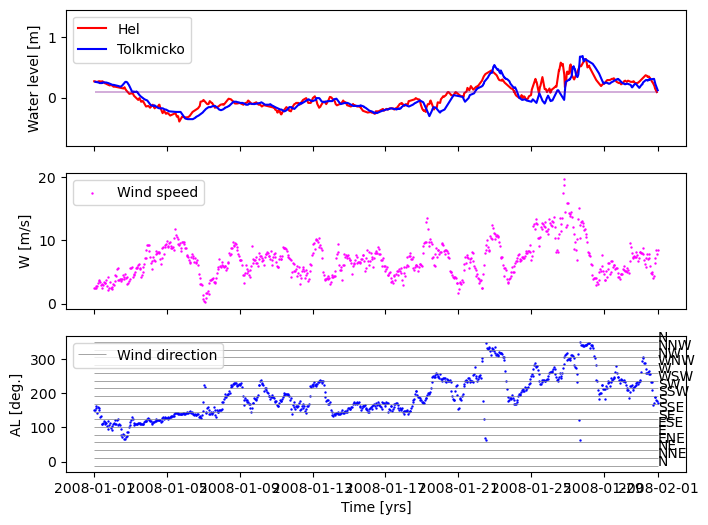

In [6]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 #

H_min = min([df_hel["wl"].min(),df_tol["wl"].min()])
H_max = max([df_hel["wl"].max(),df_tol["wl"].max()])

mean_tol = df_tol["wl"].mean()
mean_hel = df_hel["wl"].mean()

AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

        
yr = 2008
mnth = 1


f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

cond = (df_hel.index.year == yr) & (df_hel.index.month == mnth)
tmp_df = df_hel.loc[cond]
ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

cond = (df_tol.index.year == yr) & (df_tol.index.month == mnth)
tmp_df = df_tol.loc[cond]
ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

tmin = tmp_df.index.to_numpy().min()
tmax = tmp_df.index.to_numpy().max()

ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

ax1.set_ylim(H_min, H_max)

ax1.set_ylabel("Water level [m]")
ax1.legend(["Hel","Tolkmicko"])



#--------------------------------------------------------------------------
cond = (df_wind.index.year == yr) & (df_wind.index.month == mnth)
tmp_df = df_wind.loc[cond]


ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
ax2.set_ylabel("W [m/s]")
ax2.legend(["Wind speed"])

#--------------------------------------------------------------------------


ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

for i in range(len(directions)):
    ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])
#ax3.text([tmp_df.index.to_numpy().max()] * 16,AL_bins[:-1],np.array(directions))


ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
ax3.set_ylabel("AL [deg.]")
ax3.legend(["Wind direction"])


_ = plt.xlabel("Time [yrs]")

### List of interesting episodes

In [7]:
# date.fromisoformat('2019-12-04')
datelist = [("2008-01-19","2008-02-01"), ("2008-02-13","2008-02-18"), ("2008-02-21","2008-02-25"), ("2008-02-25","2008-03-29"), ("2008-04-22","2008-05-25"), ("2008-05-05","2008-06-17"), 
            ("2008-07-13","2008-07-17"), ("2008-07-21","2008-08-01"), ("2008-08-01","2008-08-09"), ("2008-08-14","2008-08-21"), ("2008-08-28","2008-09-02"), ("2008-09-13","2008-10-05"),
            ("2008-10-05","2008-10-08"), ("2008-10-09","2008-11-07"), ("2008-11-09","2008-11-13"), ("2008-11-13","2008-11-19"), ("2008-11-19","2008-11-28"), ("2008-12-17","2008-12-29"),
            ("2009-01-29","2009-02-13"), ("2009-02-17","2009-02-28"), ("2009-03-17","2009-03-21"), ("2009-03-23","2009-03-29"), ("2009-04-17","2009-05-01"), ("2009-05-01","2009-05-11"),
            ("2009-05-11","2009-05-20"), ("2009-05-29","2009-06-01"), ("2009-06-05","2009-06-09"), ("2009-06-09","2009-06-17"), ("2009-06-19","2009-07-01"), ("2009-09-04","2009-09-09"),
            ("2009-09-13","2009-09-21"), ("2009-10-03","2009-10-08"), ("2009-10-11","2009-10-17"), ("2010-06-21","2010-06-29"), ("2010-08-25","2010-08-30"), ("2010-09-01","2010-09-05"),
            ("2010-09-13","2010-09-21"), ("2010-09-25","2010-10-01"), ("2010-11-09","2010-11-15"), ("2010-11-27","2010-12-03"), ("2010-12-25","2010-12-29"), ("2011-02-05","2011-02-17"),
            ("2011-04-05","2011-04-13"), ("2011-09-13","2011-09-21"), ("2011-10-10","2011-10-17"), ("2011-11-25","2011-11-29"), ("2011-12-17","2011-12-21"), ("2012-02-21","2012-02-28"),
            ("2012-03-25","2012-03-29"), ("2012-04-05","2012-04-11"), ("2012-06-22","2012-06-29"), ("2012-07-14","2012-07-17"), ("2012-10-04","2012-10-10"), ("2013-01-02","2013-01-09"),
            ("2013-01-09","2013-01-17"), ("2013-06-03","2013-06-08"), ("2013-07-09","2013-07-16"), ("2013-07-18","2013-07-25"), ("2013-09-01","2013-09-05"), ("2013-09-22","2013-09-28"),
            ("2013-11-23","2013-12-01"), ("2013-12-05","2013-12-13"), ("2014-01-09","2014-01-17"), ("2014-03-13","2014-03-17"), ("2014-04-13","2014-04-17"), ("2014-05-25","2014-06-01"),
            ("2014-06-13","2014-06-17"), ("2014-09-21","2014-09-25"), ("2014-10-17","2014-10-23"), ("2014-10-23","2014-11-01"), ("2014-12-11","2014-12-15"), ("2015-01-01","2015-01-09"),
            ("2015-01-10","2015-01-13"), ("2015-02-07","2015-02-13"), ("2015-03-21","2015-03-24"), ("2015-03-29","2015-04-01"), ("2015-04-11","2015-04-15"), ("2015-04-17","2015-04-23"),
            ("2015-07-09","2015-07-12"), ("2015-07-29","2015-08-01"), ("2015-09-05","2015-09-13"), ("2015-10-21","2015-10-25"), ("2015-11-07","2015-11-09"), ("2016-05-14","2016-05-18"),
            ("2016-06-17","2016-06-20"), ("2016-07-13","2016-07-17"), ("2016-10-01","2016-10-08"), ("2016-10-27","2016-10-30"), ("2016-11-01","2016-11-05"), ("2016-11-14","2016-11-17"),
            ("2016-11-25","2016-12-01"), ("2016-12-03","2016-12-07"), ("2016-12-07","2016-12-10"), ("2016-12-27","2016-12-31"), ("2017-01-03","2017-01-09"), ("2017-05-07","2017-05-11"),
            ("2017-09-13","2017-09-17"), ("2017-10-02","2017-10-07"), ("2017-10-29","2017-11-01"), ("2017-11-09","2017-11-13")]

are_dates_correct = True
for event,date_range in enumerate(datelist): 
    diff = dt.date.fromisoformat(date_range[1])-dt.date.fromisoformat(date_range[0])
    if diff <= dt.timedelta(days=0):
        are_dates_correct = False
        print((event,date_range))

if are_dates_correct:
    print("All date ranges are correct")

All date ranges are correct


### Plotting each event and saving it as an image

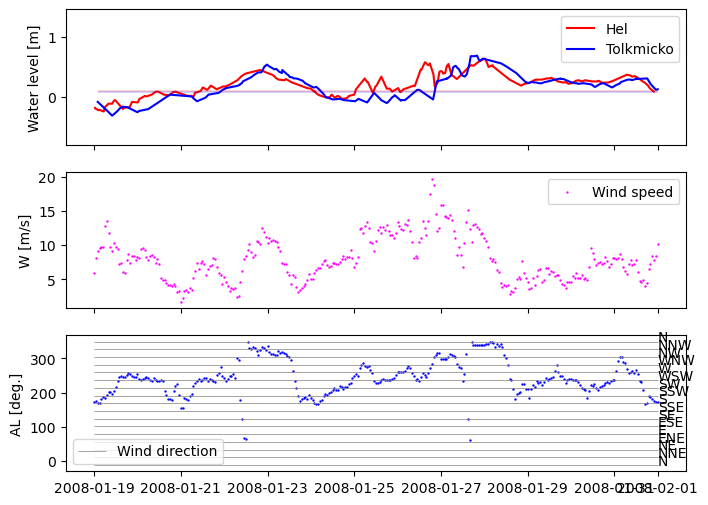

In [8]:
output_dir = "wind_events_chosen/"

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 100 #

H_min = min([df_hel["wl"].min(),df_tol["wl"].min()])
H_max = max([df_hel["wl"].max(),df_tol["wl"].max()])

mean_tol = df_tol["wl"].mean()
mean_hel = df_hel["wl"].mean()

AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]

for event,date_range in enumerate(datelist):
        f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

        cond = (df_hel.index >= date_range[0]) & (df_hel.index <= date_range[1])
        tmp_df = df_hel.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

        cond = (df_tol.index >= date_range[0]) & (df_tol.index <= date_range[1])
        tmp_df = df_tol.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

        tmin = tmp_df.index.to_numpy().min()
        tmax = tmp_df.index.to_numpy().max()

        ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
        ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

        ax1.set_ylim(H_min, H_max)

        ax1.set_ylabel("Water level [m]")
        ax1.legend(["Hel","Tolkmicko"])
#--------------------------------------------------------------------------
        cond = (df_wind.index >= date_range[0]) & (df_wind.index <= date_range[1])
        tmp_df = df_wind.loc[cond]

        ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
        ax2.set_ylabel("W [m/s]")
        ax2.legend(["Wind speed"])

#--------------------------------------------------------------------------

        ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

        for i in range(len(directions)):
            ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
        ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])

        ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
        ax3.set_ylabel("AL [deg.]")
        ax3.legend(["Wind direction"])


        #_ = plt.savefig(output_dir+"wind_event"+str(event)+".png",dpi=200)   
        #break

### Using ipywidgets for changing the events

In [9]:
def slider_on_change(x):
        date_range = datelist[x]
        f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

        cond = (df_hel.index >= date_range[0]) & (df_hel.index <= date_range[1])
        tmp_df = df_hel.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

        cond = (df_tol.index >= date_range[0]) & (df_tol.index <= date_range[1])
        tmp_df = df_tol.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

        tmin = tmp_df.index.to_numpy().min()
        tmax = tmp_df.index.to_numpy().max()

        ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
        ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

        ax1.set_ylim(H_min, H_max)

        ax1.set_ylabel("Water level [m]")
        ax1.legend(["Hel","Tolkmicko"])
#--------------------------------------------------------------------------
        cond = (df_wind.index >= date_range[0]) & (df_wind.index <= date_range[1])
        tmp_df = df_wind.loc[cond]

        ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
        ax2.set_ylabel("W [m/s]")
        ax2.legend(["Wind speed"])

#--------------------------------------------------------------------------

        ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

        for i in range(len(directions)):
            ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
        ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])

        ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
        ax3.set_ylabel("AL [deg.]")
        ax3.legend(["Wind direction"])
        
        print(date_range)

def wind_direction(AL_value):
    AL_bins = np.linspace(0,  360, 17, endpoint=True) - 22.5/2
    directions = ["N","NNE","NE","ENE","E","ESE","SE","SSE","S","SSW","SW","WSW","W","WNW","NW","NNW"]
    
    if AL_value >348.75:
        AL_value = 348.75 - AL_value
    
    for i in range(1,len(AL_bins)):
        if AL_value < AL_bins[i]:
            return(directions[i-1])
    return np.nan
      
def count_winds(AL):
    tmp = np.unique(list(map(wind_direction,AL)),return_counts=True)
    return list(zip(tmp[0],tmp[1]))

def plot_event(dateA,dateB):

        f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

        cond = (df_hel.index >= dateA) & (df_hel.index <= dateB)
        tmp_df = df_hel.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"red")

        mean_hel = np.mean(tmp_df["wl"].to_numpy())
        max_hel = np.max(tmp_df["wl"].to_numpy())
        
        cond = (df_tol.index >= dateA) & (df_tol.index <= dateB)
        tmp_df = df_tol.loc[cond]
        ax1.plot(tmp_df.index.to_numpy(),tmp_df["wl"].to_numpy(),"blue")

        mean_tol = np.mean(tmp_df["wl"].to_numpy())
        max_tol = np.max(tmp_df["wl"].to_numpy())        
        
        tmin = tmp_df.index.to_numpy().min()
        tmax = tmp_df.index.to_numpy().max()

        ax1.hlines(mean_hel,tmin,tmax,color = "red",linewidth = 0.25)
        ax1.hlines(mean_tol,tmin,tmax,color = "blue",linewidth = 0.25)

        ax1.set_ylim(H_min, H_max)

        ax1.set_ylabel("Water level [m]")
        ax1.legend(["Hel","Tolkmicko"])
#--------------------------------------------------------------------------
        cond = (df_wind.index >= dateA) & (df_wind.index <= dateB)
        tmp_df = df_wind.loc[cond]

        ax2.scatter(tmp_df.index.to_numpy(),tmp_df["W [m/s]"],color="magenta",s=0.5)
        ax2.set_ylabel("W [m/s]")
        ax2.legend(["Wind speed"])

        mean_Ws = np.mean(tmp_df["W [m/s]"].to_numpy())
        max_Ws = np.max(tmp_df["W [m/s]"].to_numpy())
#--------------------------------------------------------------------------

        ax3.hlines(AL_bins,tmp_df.index.to_numpy().min(),tmp_df.index.to_numpy().max(),colors="gray",linewidth=0.5)

        for i in range(len(directions)):
            ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[i],directions[i])
        ax3.text([tmp_df.index.to_numpy().max()] ,AL_bins[-1],directions[0])

        ax3.scatter(tmp_df.index.to_numpy(),tmp_df["AL [st]"],color="blue",s=0.5)
        ax3.set_ylabel("AL [deg.]")
        ax3.legend(["Wind direction"])       
        
        mean_AL = np.mean(tmp_df["AL [st]"].to_numpy())
        AL_count = count_winds(tmp_df["AL [st]"].to_numpy())  
        
        print("Hel: mean={}[m], max={}[m]".format(mean_hel,max_hel))
        print("Tolkmicko: mean={}[m], max={}[m]".format(mean_tol,max_tol))
        print("Ws: mean={}[m/s], max={}[m/s], AL: mean={} [deg]".format(mean_Ws,max_Ws, mean_AL))
        print(AL_count)

In [10]:
widgets.interact(slider_on_change,x=widgets.IntSlider(min=0, max=(len(datelist)-1), step=1, value=0))

interactive(children=(IntSlider(value=0, description='x', max=99), Output()), _dom_classes=('widget-interact',…

<function __main__.slider_on_change(x)>

### Creating a list of date-time ranges with wind events

In [12]:
datelist_detailed = [
    ("2008-01-22 12:00","2008-01-23 12:00"), ("2008-01-24 23:00","2008-01-27 00:00"), ("2008-02-14 12:00","2008-02-17 00:00"), ("2008-02-22 00:00","2008-02-24 00:00"), ("2008-02-27 06:00","2008-02-28 12:00"),
    ("2008-03-06 00:00","2008-03-07 06:00"), ("2008-03-12 20:00","2008-03-14 00:00"), ("2008-07-13 14:00","2008-07-14 12:00"), ("2008-07-23 00:00","2008-07-29 00:00"), ("2008-08-04 12:00","2008-08-06 08:00"),
    ("2008-08-29 12:00", "2008-08-31 00:00"), ("2008-10-01 18:00", "2008-10-03 06:00"), ("2008-11-11 10:00", "2008-11-12 02:00"), ("2008-11-17 06:00", "2008-11-17 18:00"), ("2008-12-22 06:00", "2008-12-22 18:00"),
    ("2008-12-22 18:00", "2008-12-24 18:00"), ("2009-06-22 23:00", "2009-06-26 12:00"), ("2009-10-04 06:00", "2009-10-05 06:00"), ("2009-10-13 06:00", "2009-10-15 12:00"), ("2010-08-25 03:00", "2010-08-25 23:00"),
    ("2010-09-01 12:00", "2010-09-03 12:00"), ("2010-09-16 00:00", "2010-09-19 12:00"), ("2010-09-28 12:00", "2010-09-29 18:00"), ("2010-11-12 12:00", "2010-11-13 09:00"), ("2010-11-29 00:00", "2010-12-01 00:00"),
    ("2011-02-08 00:00", "2011-02-09 12:00"), ("2011-09-14 06:00", "2011-09-16 00:00"), ("2011-11-26 06:00", "2011-11-28 09:00"), ("2011-12-18 06:00", "2011-12-19 18:00"), ("2012-04-08 06:00", "2012-04-09 00:00"),
    ("2012-06-25 00:00", "2012-06-26 18:00"), ("2012-07-14 18:00", "2012-07-15 06:00"), ("2012-10-05 12:00", "2012-10-06 12:00"), ("2013-06-04 12:00", "2013-06-06 00:00"), ("2013-07-12 12:00", "2013-07-13 12:00"),
    ("2013-09-03 06:00", "2013-09-04 00:00"), ("2013-09-24 00:00", "2013-09-25 00:00"), ("2013-11-27 00:00", "2013-11-28 12:00"), ("2013-12-05 12:00", "2013-12-07 00:00"), ("2014-01-12 18:00", "2014-01-13 12:00"),
    ("2014-03-15 00:00", "2014-03-15 18:00"), ("2014-04-15 12:00", "2014-04-16 12:00"), ("2014-09-23 00:00", "2014-09-24 00:00"), ("2014-12-12 12:00", "2014-12-14 00:00"), ("2015-01-02 00:00", "2015-01-04 00:00"),
    ("2015-01-10 15:00", "2015-01-12 00:00"), ("2015-02-08 00:00", "2015-02-09 12:00"), ("2015-03-30 06:00", "2015-03-31 12:00"), ("2015-07-30 00:00", "2015-07-31 06:00"), ("2015-11-08 00:00", "2015-11-08 15:00"),
    ("2016-06-17 18:00", "2016-06-18 12:00"), ("2016-10-03 12:00", "2016-10-07 00:00"), ("2016-10-27 12:00", "2016-10-29 12:00"), ("2017-01-03 12:00", "2017-01-04 18:00"), ("2017-01-04 18:00", "2017-01-07 12:00"),
    ("2017-10-02 00:00", "2017-10-07 00:00"), ('2017-10-29 12:00', '2017-10-31 12:00'), ('2017-11-10 00:00', '2017-11-13 00:00') ]

In [13]:
date_start = []
date_end = []
mean_Ws = []
max_Ws = []
mean_AL = []
dominating_wind_direction = []
mean_wl_hel = []
mean_wl_tol = []

max_wl_hel = []
max_wl_tol = []
duration = []

for dr in datelist_detailed:
    dateA = dr[0]
    dateB = dr[1]
    
    duration.append(dt.datetime.fromisoformat(dateB)-dt.datetime.fromisoformat(dateA))
    
    date_start.append(dateA)
    date_end.append(dateB)

    cond = (df_hel.index >= dateA) & (df_hel.index <= dateB)
    tmp_df = df_hel.loc[cond]

    mean_wl_hel.append(np.mean(tmp_df["wl"].to_numpy()))
    max_wl_hel.append(np.max(tmp_df["wl"].to_numpy()))
        
    cond = (df_tol.index >= dateA) & (df_tol.index <= dateB)
    tmp_df = df_tol.loc[cond]
 
    mean_wl_tol.append(np.mean(tmp_df["wl"].to_numpy()))
    max_wl_tol.append(np.max(tmp_df["wl"].to_numpy()))    
    
    cond = (df_wind.index >= dateA) & (df_wind.index <= dateB)
    tmp_df = df_wind.loc[cond]
    mean_Ws.append(np.mean(tmp_df["W [m/s]"].to_numpy()))
    max_Ws.append(np.max(tmp_df["W [m/s]"].to_numpy()))
    mean_AL.append(np.mean(tmp_df["AL [st]"].to_numpy()))
    
    dominating_wind_direction.append(
    sorted(
        count_winds(tmp_df["AL [st]"].to_numpy())
            ,key=lambda x: x[1],reverse=True)[:3]
    )
    
df_wind_events = pd.DataFrame({"start":date_start,"end":date_end, "mean Ws":np.round(mean_Ws,2), "max Ws":max_Ws,
              "mean AL [deg]":np.round(mean_AL,2), "dom. wd":dominating_wind_direction, "meanTol":np.round(mean_wl_tol,2),
              "maxTol":max_wl_tol,"meanHel":np.round(mean_wl_hel,2),"maxHel":max_wl_hel,"duration":duration})
df_wind_events.head(3)

,start,end,mean Ws,max Ws,mean AL [deg],dom. wd,meanTol,maxTol,meanHel,maxHel,duration
0,2008-01-22 12:00,2008-01-23 12:00,9.49,12.45,310.70,"[(NW, 16), (NNW, 8), (ENE, 1)]",0.44,0.54,0.33,0.45,1 days 00:00:00
1,2008-01-24 23:00,2008-01-27 00:00,12.01,19.73,259.22,"[(WSW, 21), (W, 14), (SW, 7)]",0.02,0.26,0.26,0.58,2 days 01:00:00
2,2008-02-14 12:00,2008-02-17 00:00,8.46,14.78,186.48,"[(WSW, 14), (NNW, 12), (NNE, 8)]",0.44,0.78,0.30,0.60,2 days 12:00:00


In [14]:
df_wind_events["duration"].dt.total_seconds()

0      86400.0
1     176400.0
2     216000.0
3     172800.0
4     108000.0
5     108000.0
6     100800.0
7      79200.0
8     518400.0
9     158400.0
10    129600.0
11    129600.0
12     57600.0
13     43200.0
14     43200.0
15    172800.0
16    306000.0
17     86400.0
18    194400.0
19     72000.0
20    172800.0
21    302400.0
22    108000.0
23     75600.0
24    172800.0
25    129600.0
26    151200.0
27    183600.0
28    129600.0
29     64800.0
30    151200.0
31     43200.0
32     86400.0
33    129600.0
34     86400.0
35     64800.0
36     86400.0
37    129600.0
38    129600.0
39     64800.0
40     64800.0
41     86400.0
42     86400.0
43    129600.0
44    172800.0
45    118800.0
46    129600.0
47    108000.0
48    108000.0
49     54000.0
50     64800.0
51    302400.0
52    172800.0
53    108000.0
54    237600.0
55    432000.0
56    172800.0
57    259200.0
Name: duration, dtype: float64

### Comparing wind events duration with water levels

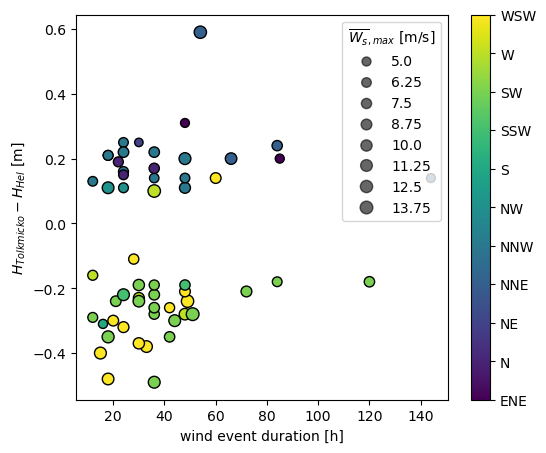

In [15]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

t = df_wind_events["duration"].dt.total_seconds() /3600 # in hours
mean_tol = df_wind_events["meanTol"].to_numpy()
mean_hel = df_wind_events["meanHel"].to_numpy()

winds = np.array(list(map(lambda x:x[0][0],df_wind_events["dom. wd"])))
wd = np.unique(winds)
wdict = { d:i for i,d in enumerate(wd)}
colour = np.array(list(map(lambda key:wdict[key],winds)))
#colour = df_wind_events["mean AL [deg]"].to_numpy()

size = df_wind_events["max Ws"].to_numpy()

scatter = plt.scatter(t,mean_tol-mean_hel,c = colour, s = 4*size,edgecolor="black")
plt.xlabel("wind event duration [h]")
plt.ylabel("$H_{Tolkmicko}-H_{Hel}$ [m]")
#plt.colorbar()
cbar = plt.colorbar(ticks=range(len(wd)))
_ = cbar.ax.set_yticklabels(wd)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, np.array(range(20,61,5))/4, loc="upper right", title=r"$\overline{W_s}_{,max}$ [m/s]")

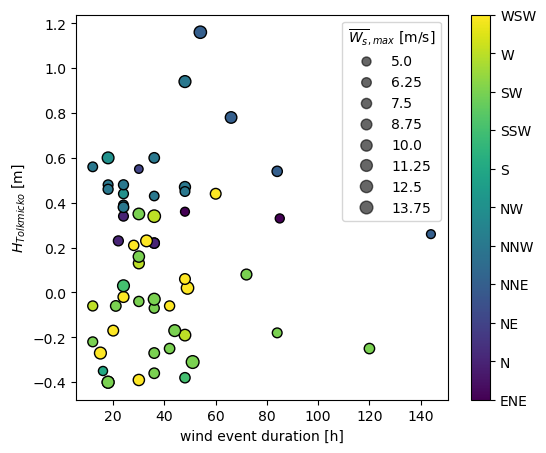

In [16]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

t = df_wind_events["duration"].dt.total_seconds() /3600 # in hours # in hours
mean_tol = df_wind_events["meanTol"].to_numpy()
mean_hel = df_wind_events["meanHel"].to_numpy()

winds = np.array(list(map(lambda x:x[0][0],df_wind_events["dom. wd"])))
wd = np.unique(winds)
wdict = { d:i for i,d in enumerate(wd)}
colour = np.array(list(map(lambda key:wdict[key],winds)))
#colour = df_wind_events["mean AL [deg]"].to_numpy()

size = df_wind_events["max Ws"].to_numpy()

scatter = plt.scatter(t,mean_tol,c = colour, s = 4*size,edgecolor="black")
plt.xlabel("wind event duration [h]")
plt.ylabel("$H_{Tolkmicko}$ [m]")
#plt.colorbar()
cbar = plt.colorbar(ticks=range(len(wd)))
_ = cbar.ax.set_yticklabels(wd)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, np.array(range(20,61,5))/4, loc="upper right", title=r"$\overline{W_s}_{,max}$ [m/s]")

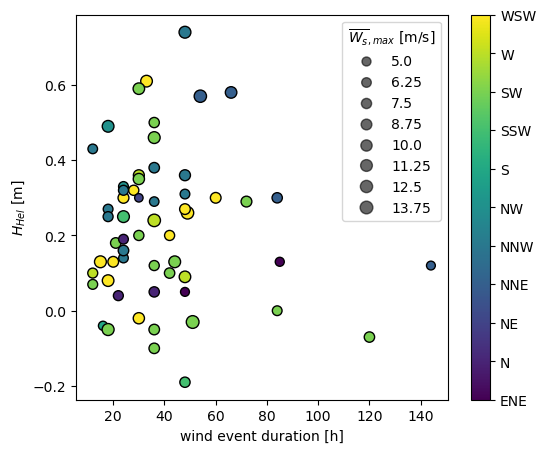

In [17]:
plt.rcParams['figure.figsize'] = [6, 5]
plt.rcParams['figure.dpi'] = 100 #

t = df_wind_events["duration"].dt.total_seconds() /3600 # in hours # in hours
mean_tol = df_wind_events["meanTol"].to_numpy()
mean_hel = df_wind_events["meanHel"].to_numpy()

winds = np.array(list(map(lambda x:x[0][0],df_wind_events["dom. wd"])))
wd = np.unique(winds)
wdict = { d:i for i,d in enumerate(wd)}
colour = np.array(list(map(lambda key:wdict[key],winds)))
#colour = df_wind_events["mean AL [deg]"].to_numpy()

size = df_wind_events["max Ws"].to_numpy()

scatter = plt.scatter(t,mean_hel,c = colour, s = 4*size,edgecolor="black")
plt.xlabel("wind event duration [h]")
plt.ylabel("$H_{Hel}$ [m]")
#plt.colorbar()
cbar = plt.colorbar(ticks=range(len(wd)))
_ = cbar.ax.set_yticklabels(wd)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
plt.legend(handles, np.array(range(20,61,5))/4, loc="upper right", title=r"$\overline{W_s}_{,max}$ [m/s]")